Total points > 1: 6113


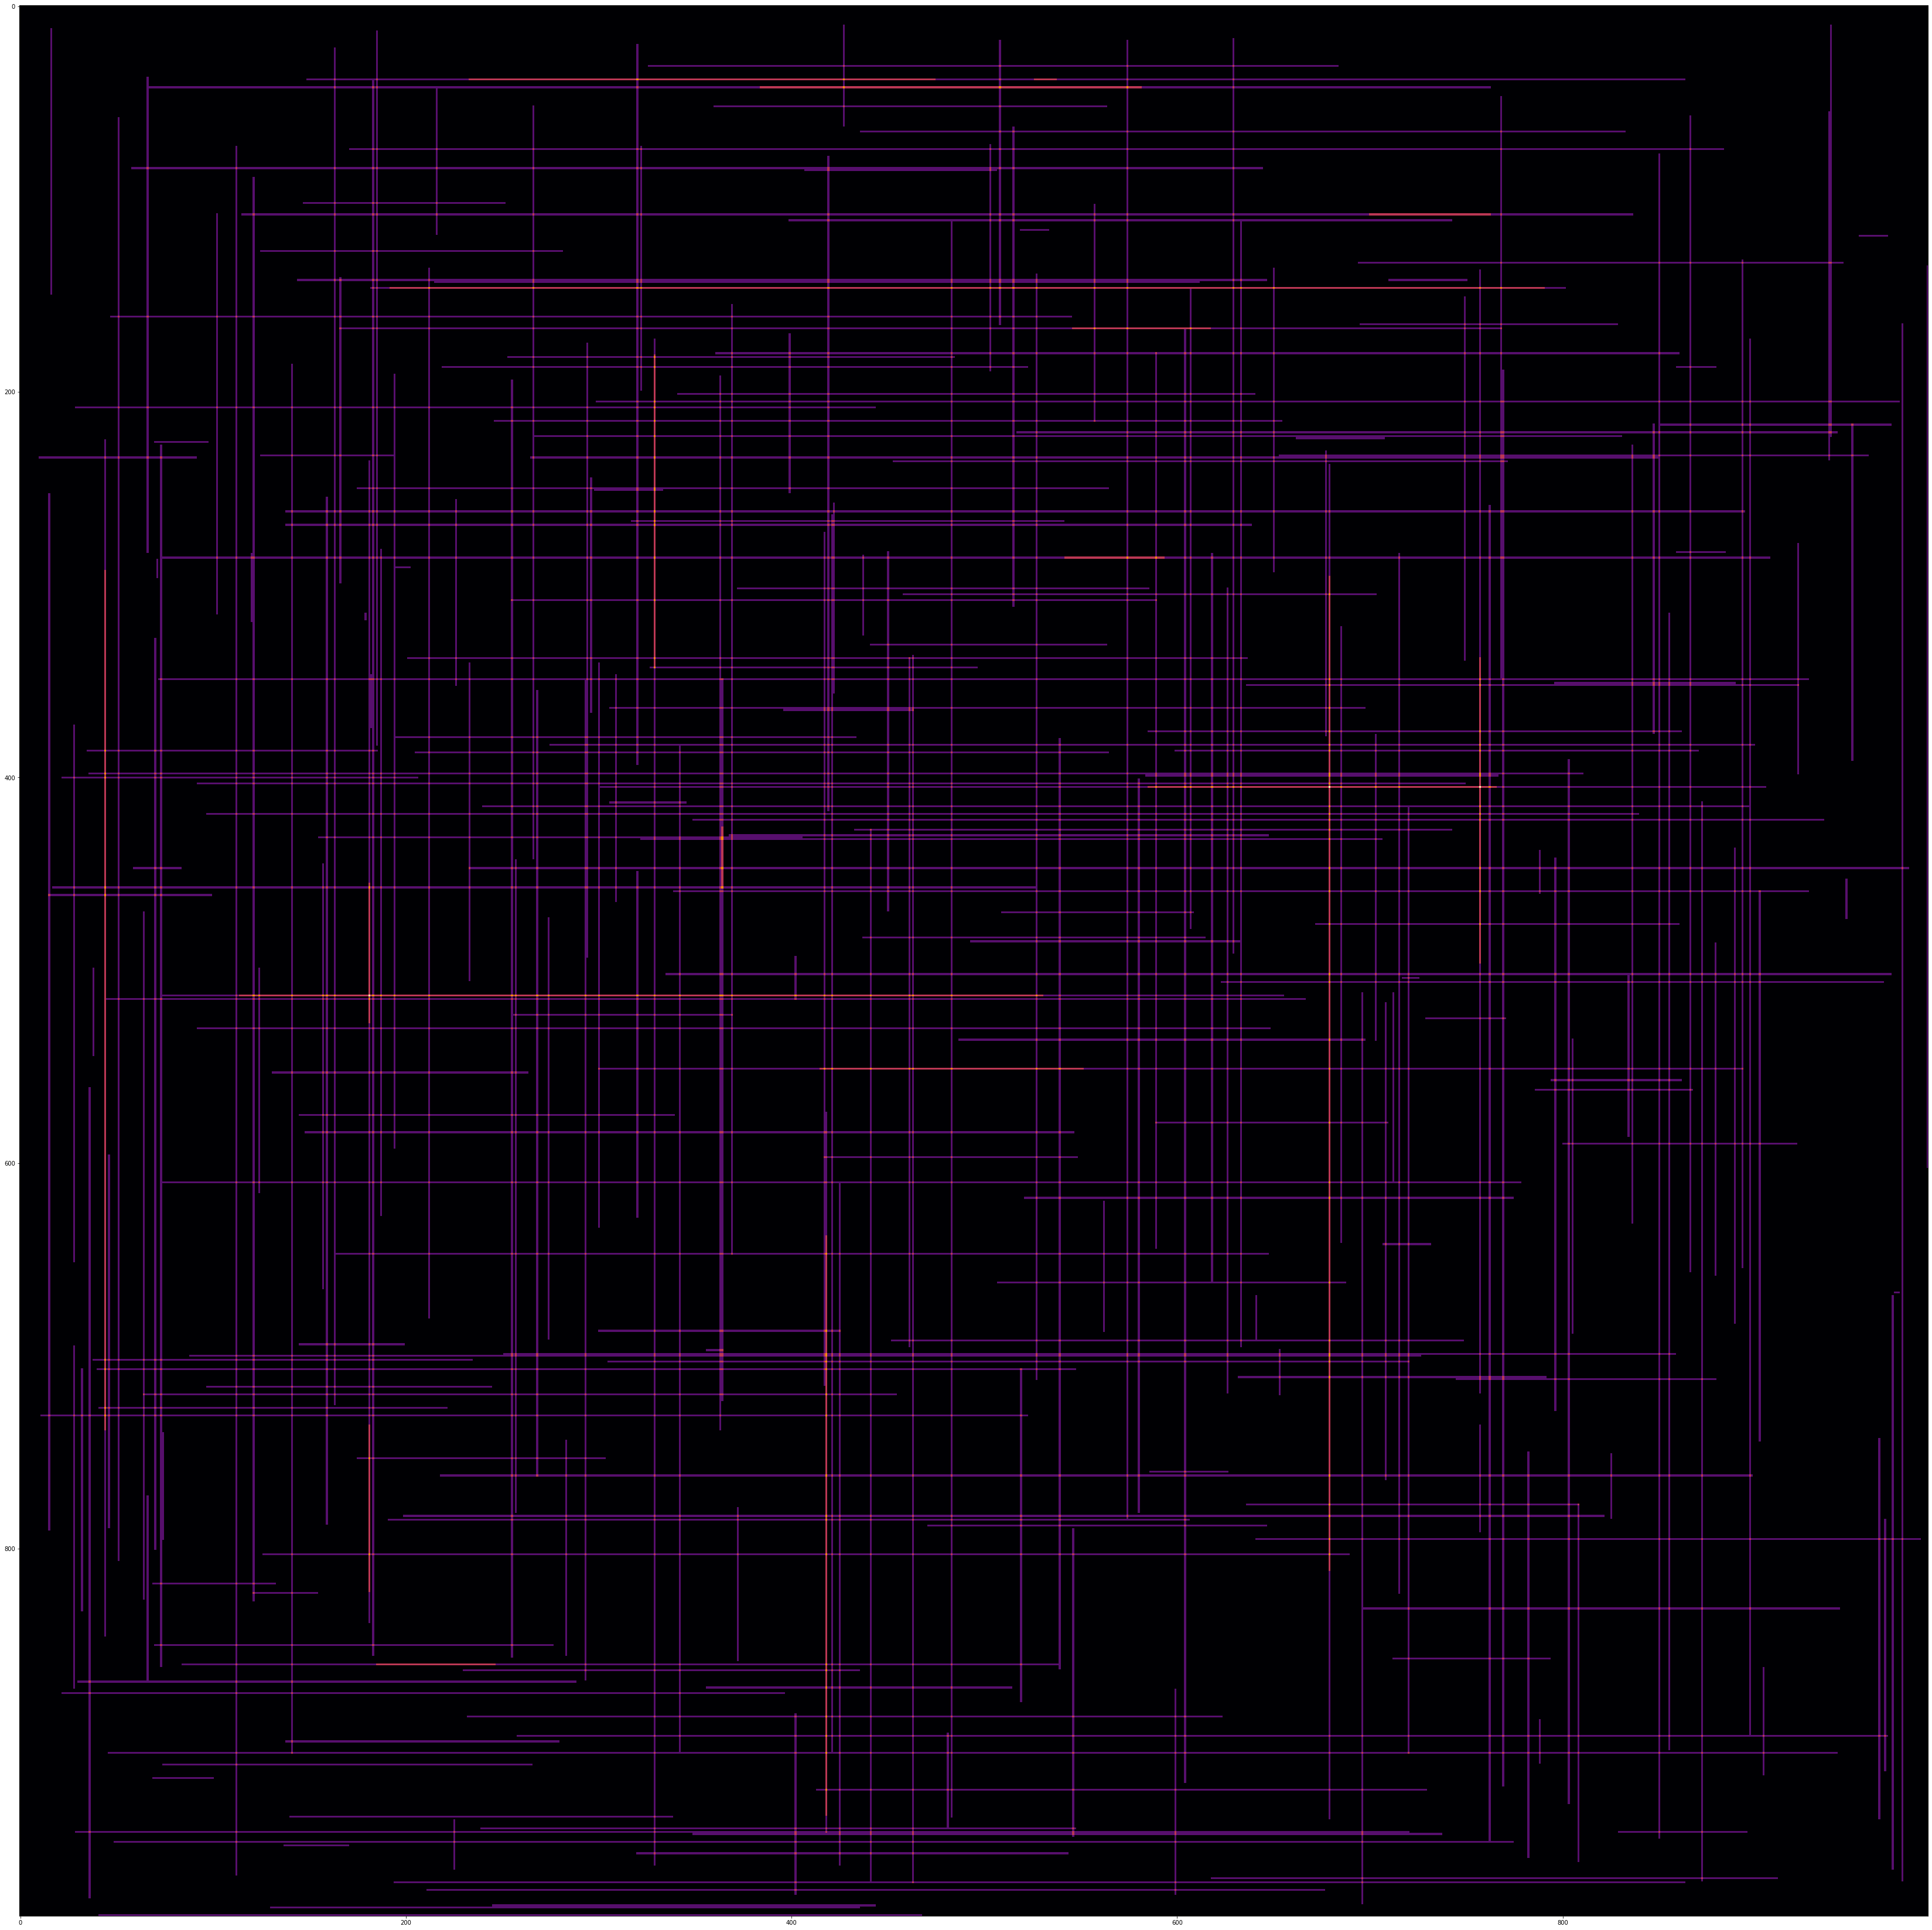

In [21]:
import re
import copy
from IPython.display import clear_output
from time import sleep
from matplotlib import pyplot, colors

class Point():
    def __init__(self, x, y):
        self.x = int(x)
        self.y = int(y)

    def __str__(self) -> str:
        return f"[{self.x}, {self.y}]"


class Line():
    def __init__(self, data):
        m = re.match("(\d+),(\d+) -> (\d+),(\d+)", data)
        self.start = Point(m.group(1), m.group(2))
        self.end = Point(m.group(3), m.group(4))

    def __str__(self) -> str:
        return f"[{self.start}, {self.end}]"

def print_arena(arena: list, newest = Point(-1, -1)):
    clear_output()
    for y, row in enumerate(arena):
        str_row = list(map(lambda n: str(n) if n > 0 else '.',row))
        if newest.y == y:
            str_row[newest.x] = "*"
        print("".join(str_row))


final = 1

if not final:
    data = open(r"data0.txt").readlines()
else:
    data = open(r"data1.txt").readlines()


lines = []
for d in data:
    lines.append(Line(d))

max_x_value = max([max(pt.start.x, pt.end.x) for pt in [line for line in lines]] )
max_y_value = max([max(pt.start.y, pt.end.y) for pt in [line for line in lines]] )


arena = []
for y in range(0,max_y_value + 1):
    line = []
    for x in range(0,max_x_value + 1):
        line.append(0)
    arena.append(line)


for line in lines:
    if line.start.x == line.end.x or line.start.y == line.end.y:
        if line.start.x > line.end.x or line.start.y > line.end.y:
            line.start, line.end = line.end, line.start
        for x in range(line.start.x, line.end.x + 1):
            for y in range(line.start.y,line.end.y + 1):
                arena[y][x] += 1



total = 0
for row in arena:
    total += sum(map(lambda p: 1 if p > 1 else 0, row))

print(f"Total points > 1: {total}")

pyplot.figure(figsize=(60, 60))
pyplot.imshow(arena, cmap="inferno")
pyplot.show()

In [22]:
arena = []
for y in range(0,max_y_value + 1):
    line = []
    for x in range(0,max_x_value + 1):
        line.append(0)
    arena.append(line)


for line in lines:
    y_move = line.end.y - line.start.y
    x_move = line.end.x - line.start.x

    y_move = 0 if y_move == 0 else y_move // abs(y_move)
    x_move = 0 if x_move == 0 else x_move // abs(x_move)

    x = line.start.x
    y = line.start.y


    # while x != line.end.x + x_move or y != line.end.y + y_move:
    x_end, y_end = False, False

    for i in range(1000):

        if x_end and y_end:
            break

        arena[y][x] += 1
        
        if x_move > 0:
            if x < line.end.x:
                x += x_move
            else:
                x_end = True
        if x_move < 0:
            if x > line.end.x:
                x += x_move
            else:
                x_end = True
        if x_move == 0:
            x_end = True


        if y_move > 0:
            if y < line.end.y:
                y += y_move
            else:
                y_end = True
        if y_move < 0:
            if y > line.end.y:
                y += y_move
            else:
                y_end = True
        if y_move == 0:
            y_end = True


Total points > 1: 20373


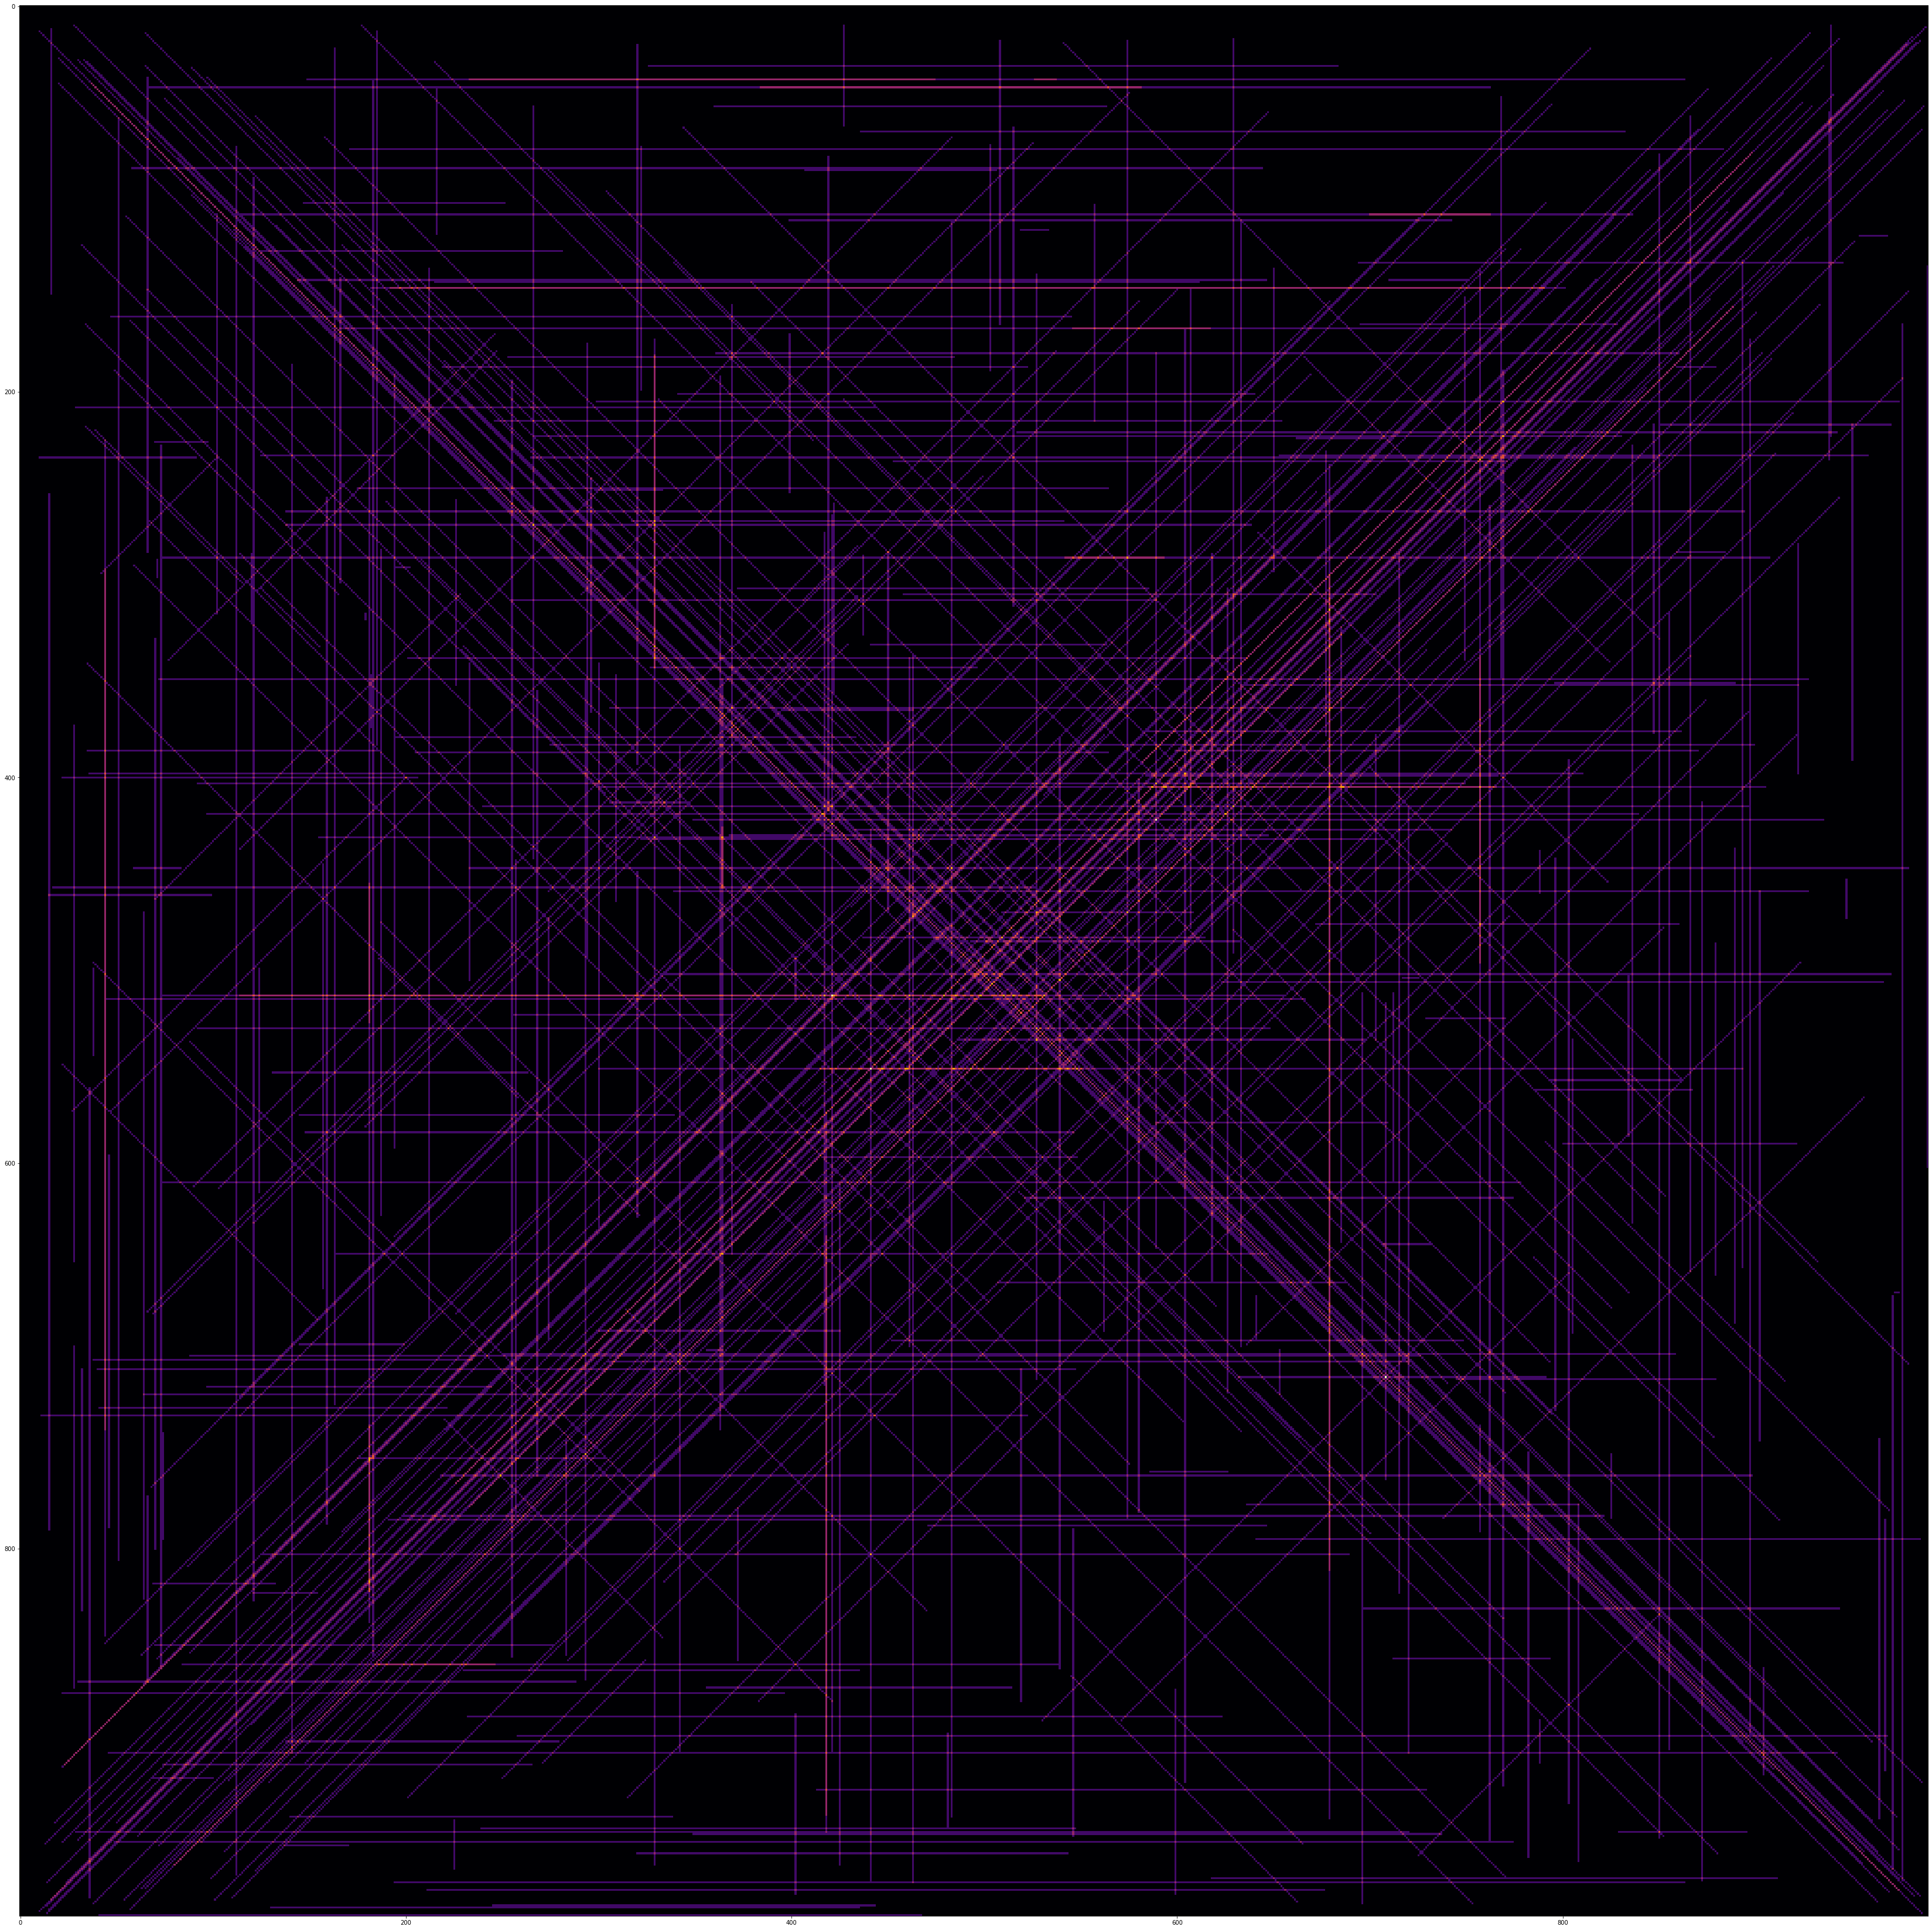

In [23]:

total = 0
for row in arena:
    total += sum(map(lambda p: 1 if p > 1 else 0, row))

print(f"Total points > 1: {total}")

pyplot.figure(figsize=(60, 60))
pyplot.imshow(arena, cmap="inferno")
pyplot.show()